### Prediction of the age of abalone

#### Dataset fetched from UCI machine learning data repository 

In [31]:
# Importing necessary libraries.

import pandas as pd
import io
import requests
import seaborn as sns

In [74]:
# Fetching data from UCI repository

url="https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
s = requests.get(url).content

df_abalone = pd.read_csv( io.StringIO(s.decode('utf-8')), names = ['Sex', 'Length', 'Diameter', 'Height', 
                                                                   'Whole weight','Shucked weight',
                                                                   'Viscera weight', 'Shell weight', 'Rings'],)

In [12]:
# Checking if dataset contains any missing values and applying suitable data imputation if required.
df_abalone.isnull().values.any()

False

In [59]:
# Some general statistics of the data. Could be handly later on.
df_abalone.describe().transpose()

# Interesting to see that the minimum height recorded is 0. Could be an error, will investigate.

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


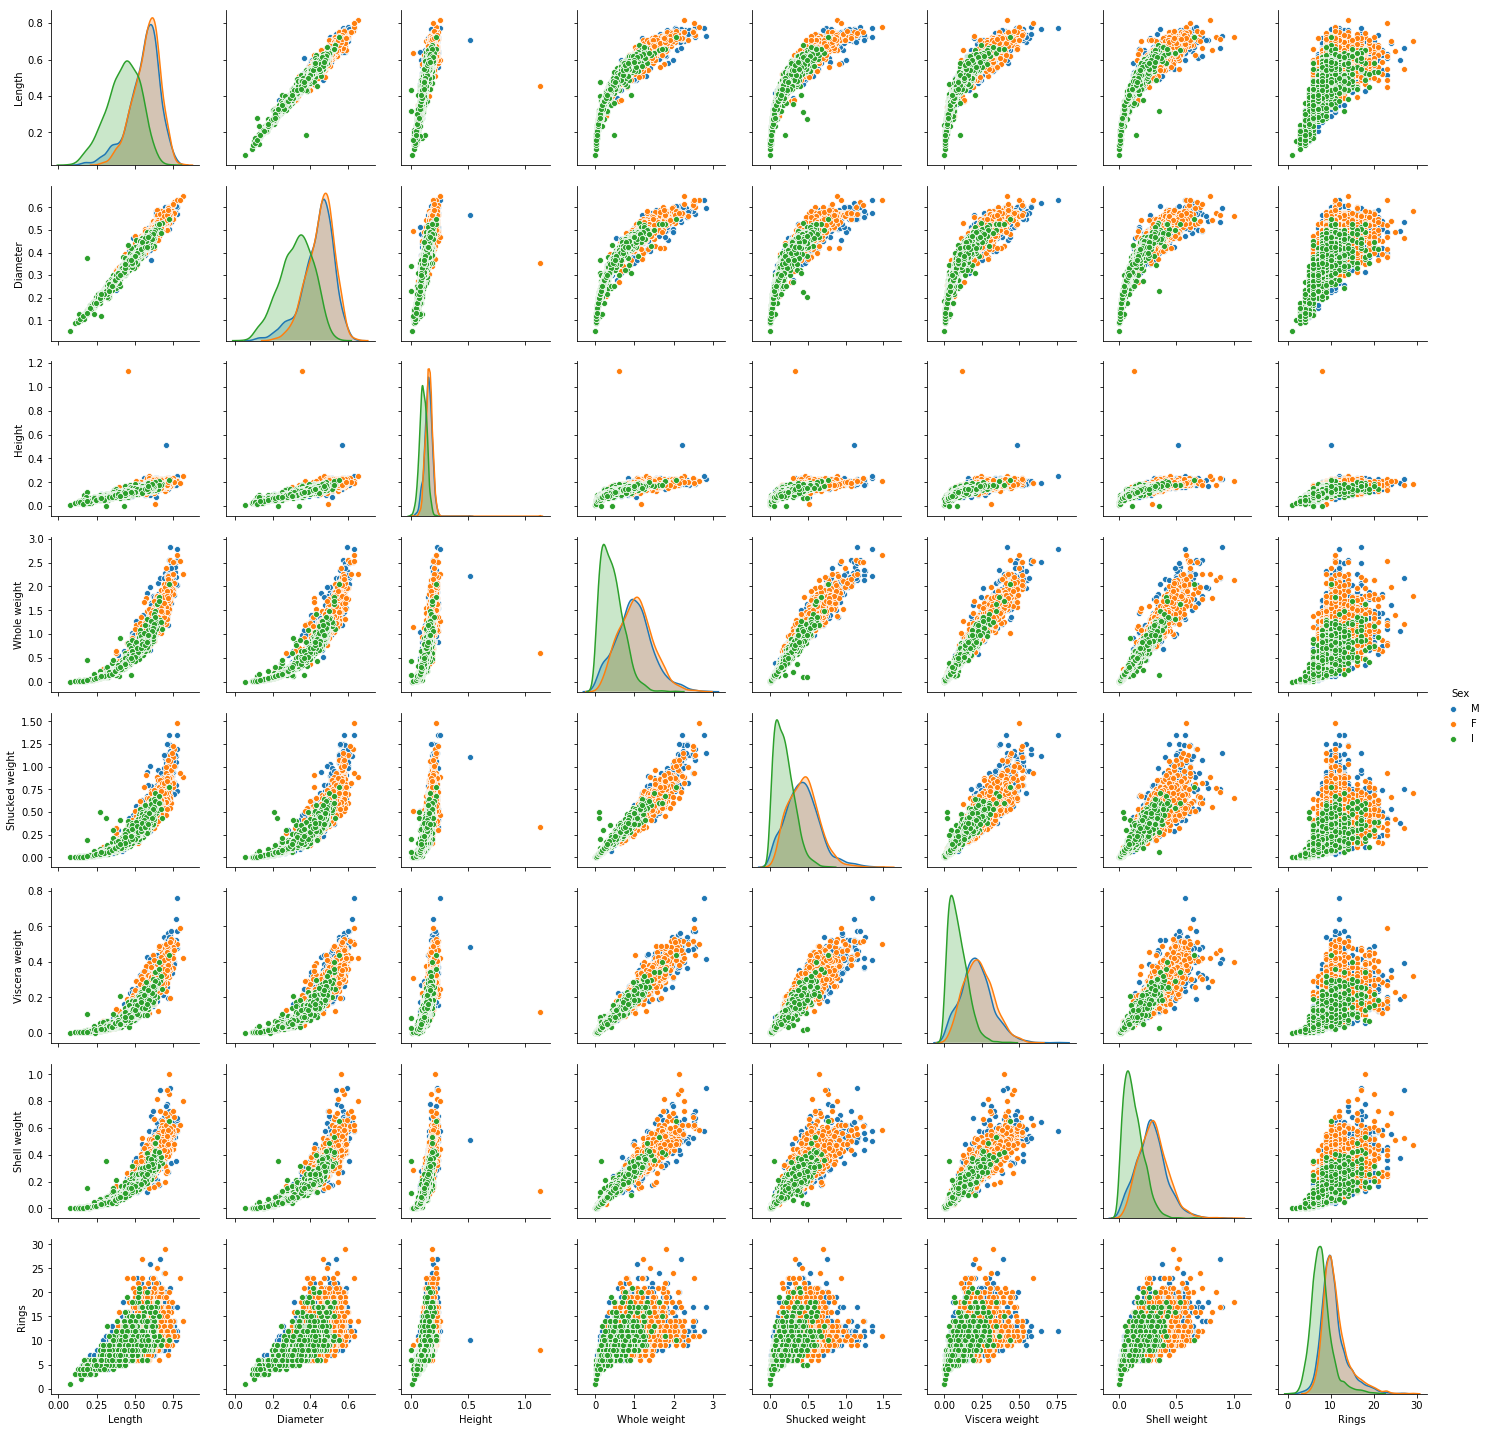

In [34]:
# Visualizing the data to get insights.

sns.pairplot(df_abalone, hue = 'Sex')

In [75]:

# Fitting data to a regression model. The dependent variable here is Rings. The age of an abalone can be determined by
# adding 1.5 to the number of rings.

# First performing OHE to enable the regression model to be able to digest categorical variable Sex.
sex_dummies = pd.get_dummies(df_abalone.Sex, prefix = 'sex')

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
df_abalone = pd.concat([df_abalone, sex_dummies], axis=1)
df_abalone.head()


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

feature_cols = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 
                'sex_M', 'sex_F', 'sex_I']

X = df_abalone[feature_cols].values
y = df_abalone.Rings.values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients obtained.
print(feature_cols, model.coef_)

['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'sex_M', 'sex_F', 'sex_I'] [ -1.45240996  12.65718031   9.16105749   8.48824635 -19.41954003
  -9.07097611   8.83729616   0.33456049   0.23750071  -0.57206119]


In [76]:
# Testing the possibility of mulitcollinearity in the data by calculating the Variance Inflation Factor.

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [float(variance_inflation_factor(X, i)) for i in range(X.shape[1])]

print(vif)

[40.945762752165265, 42.379841434358106, 3.5813688641363264, 109.76870999634583, 28.55054616731841, 17.445011536590822, 21.263271930469305, 25.751172676674138, 23.07956071662752, 19.854571881572387]


In [49]:
# The VIF values are very high (away from 1). It seems like the predictors are correlated.
df_abalone.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000
